In [19]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.image as img

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

im=img.imread(r'/Users/shivyucel/Documents/projects/DPhil/Code_Data/misc/north_arrow.jpeg')
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap.to_crs(epsg=3857, inplace=True)


In [20]:
us = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/united_states/THI_mobility_heat_w_vars_90_4SD_precip.csv')
us['adm0'] = 'United States'
us.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
us.rename(columns={'Heat Wave Duration_y': 'Heat Wave Duration'}, inplace=True)
us_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/united_states/clean_shp.shp')
us_plot = us_plot[us_plot['adm1'] != 'Alaska']
us_plot['adm0'] = 'United States'


br = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/brazil/THI_mobility_heat_w_vars_90_4SD_precip.csv')
br['adm0'] = 'Brazil'
br.rename(columns={'temp_diff': 'thi_diff'}, inplace=True)
br.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
br_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/brazil/clean_shp.shp')
br_plot['adm0'] = 'Brazil'

ind = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/india/THI_mobility_heat_w_vars_90_4SD_precip.csv')
ind['adm0'] = 'India'
ind.rename(columns={'temp_diff': 'thi_diff'}, inplace=True)
ind.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
ind_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/india/clean_shp.shp')
ind_plot['adm0'] = 'India'


ng = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/nigeria/THI_mobility_heat_w_vars_90_4SD_precip.csv')
ng['adm0'] = 'Nigeria'
ng.rename(columns={'temp_diff': 'thi_diff'}, inplace=True)
ng.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
ng_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/nigeria/clean_shp.shp')
ng_plot['adm0'] = 'Nigeria'

fr = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/france/THI_mobility_heat_w_vars_90_4SD_precip.csv')
fr['adm0'] = 'France'
fr.rename(columns={'temp_diff': 'thi_diff'}, inplace=True)
fr.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
#france-specific change
fr_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/france/clean_shp.shp')
fr_plot.rename(columns={'name_1': 'adm1'}, inplace=True)
fr_plot['location'] = fr_plot['adm2'] + ', ' + fr_plot['adm1']
fr_plot['adm0'] = 'France'

tr = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/turkey/THI_mobility_heat_w_vars_90_4SD_precip.csv')
tr['adm0'] = 'Turkey'
tr.rename(columns={'temp_diff': 'thi_diff'}, inplace=True)
tr.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
tr.rename(columns={'Heat Wave Duration_y': 'Heat Wave Duration'}, inplace=True)
tr_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/turkey/clean_shp.shp')
tr_plot['adm0'] = 'Turkey'


ch = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/china/THI_mobility_heat_w_vars_90_4SD.csv')
ch['adm0'] = 'China'
concat = pd.concat([fr, br, us, tr, ind, ng, ch])

In [21]:
len(ng['location'].unique())

152

In [3]:
concat_shp = gpd.GeoDataFrame(pd.concat([fr_plot, br_plot, us_plot, tr_plot, ng_plot, ind_plot])).set_crs(epsg='4326', allow_override=True)
concat_shp.to_crs(epsg=3857, inplace=True)

/Users/shivyucel/opt/anaconda3/envs/ox/lib/python3.11/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [4]:
mean_thi = concat.groupby('location')['thi_heat'].mean().reset_index()

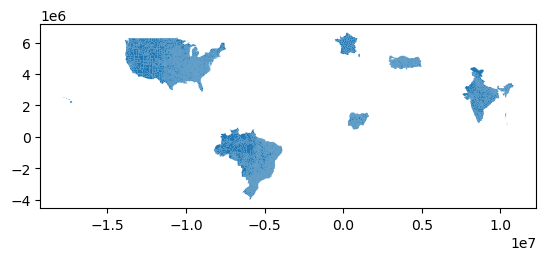

In [5]:
concat_shp.plot()
concat_plot_data = gpd.GeoDataFrame(mean_thi.merge(concat_shp, on='location')).set_crs(epsg='3857', allow_override=True)

In [18]:
ng

,Unnamed: 0,index,country_region_code,country_region,adm1,adm2,metro_area,iso_3166_2_code,census_fips_code,place_id,...,coast,HDI_dec,popden_dec,over60_dec,elev_1500m,time_x,rain_standard_control,time_y,rain_standard_heat,adm0
0,0,0,NG,Nigeria,Abia,Aba North,NaN,NaN,NaN,ChIJJ9SHpK2eQhARZRwKEePBcuk,...,0,8,10,7,0,2022-02-28,41.208791,2022-03-07,70.329670,Nigeria
1,1,1,NG,Nigeria,Abia,Aba North,NaN,NaN,NaN,ChIJJ9SHpK2eQhARZRwKEePBcuk,...,0,8,10,7,0,2022-02-22,10.439560,2022-03-08,72.527473,Nigeria
2,2,2,NG,Nigeria,Abia,Aba South,NaN,NaN,NaN,ChIJcXDuChycQhARUr8yL5GPm98,...,0,8,10,5,0,2022-02-28,36.813187,2022-03-07,61.538462,Nigeria
3,3,3,NG,Nigeria,Abia,Aba South,NaN,NaN,NaN,ChIJcXDuChycQhARUr8yL5GPm98,...,0,8,10,5,0,2022-02-22,10.989011,2022-03-08,69.780220,Nigeria
4,4,4,NG,Nigeria,Abia,Aba South,NaN,NaN,NaN,ChIJcXDuChycQhARUr8yL5GPm98,...,0,8,10,5,0,2022-03-15,70.879121,2022-03-29,54.395604,Nigeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,1384,1447,NG,Nigeria,Zamfara,Gusau,NaN,NaN,NaN,ChIJlyUOw4XCsxERJi_qqjf8lzI,...,0,2,4,2,0,2022-03-30,7.967033,2022-04-13,95.604396,Nigeria
1385,1385,1448,NG,Nigeria,Zamfara,Gusau,NaN,NaN,NaN,ChIJlyUOw4XCsxERJi_qqjf8lzI,...,0,2,4,2,0,2022-03-31,7.967033,2022-04-07,84.615385,Nigeria
1386,1386,1449,NG,Nigeria,Zamfara,Gusau,NaN,NaN,NaN,ChIJlyUOw4XCsxERJi_qqjf8lzI,...,0,2,4,2,0,2022-03-31,7.967033,2022-04-14,96.153846,Nigeria
1387,1387,1450,NG,Nigeria,Zamfara,Gusau,NaN,NaN,NaN,ChIJlyUOw4XCsxERJi_qqjf8lzI,...,0,2,4,2,0,2022-03-31,7.967033,2022-04-21,97.802198,Nigeria


In [17]:
ng['thi_heat'].mean()

38.62573474973605

In [6]:
worldmap = worldmap[worldmap['continent'] != 'Antarctica']

In [7]:
dissolved = concat_shp.dissolve(by='adm0')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.27, 0.021999999999999992, 'N')

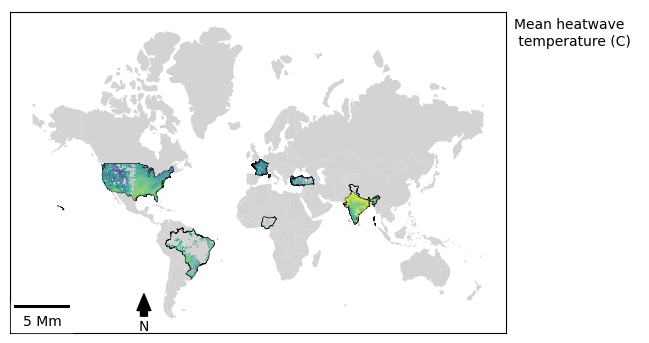

In [8]:
fig, ax = plt.subplots()
worldmap.plot(color="lightgrey", ax=ax)
dissolved.plot(edgecolor='black', facecolor='none', ax=ax, linewidth=0.5)
concat_plot_data.plot(ax=ax, column='thi_heat')
ax.add_artist(ScaleBar(1, location='lower left')  )

ax.set_yticks([])
ax.set_xticks([])
ax.legend(loc=(1, .83),
          fontsize=15,
          frameon=False,
          title="Mean heatwave \n temperature (C)")

x, y, arrow_length = 0.27, 0.122, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=10),
            ha='center', va='center', fontsize=10,
            xycoords=ax.transAxes)




In [9]:
concat.groupby('adm0').apply(lambda x: len(x['location'].unique()))

adm0
Brazil           1519
China             339
France             91
India             609
Nigeria           152
Turkey            490
United States    2723
dtype: int64

In [14]:
concat.drop_duplicates('heat_ID').groupby('adm0').count()

,Unnamed: 0,index,adm1,adm2,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,...,makeup_day_heat,t2m_heat,mob_index_control,holiday_control,makeup_day_control,mobility_difference,t2m_control,popdens_dec,baseline_mobility,mobility_diff_pct
adm0,,,,,,,,,,,,,,,,,,,,,
Brazil,3682,3682,3682,3682,3682,3682,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
China,1436,1436,1436,1436,0,0,0,0,0,0,...,1436,1436,1436,1436,1436,1436,1436,1436,1436,1436
France,483,483,483,483,483,483,483,483,0,483,...,0,0,0,0,0,0,0,0,0,0
India,1574,1574,1574,1574,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nigeria,440,440,440,440,440,440,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Turkey,1645,1645,1645,1645,1645,1645,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
United States,11807,11807,11807,11807,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
concat_clean = concat[['adm0', 'adm1', 'adm2', 'location', 'Heat Wave Duration', 'rain_standard_heat', 'rain_standard_control', 'heatwave_dur', 'diff', 'thi_heat', 'thi_diff', 'heat_ID', 'stage_frac', 'weekend', 'popden_dec', 'over60_dec', 'HDI_dec', 'coast', 'mean_elev', 'elev_1500m', 'residential_difference', 'workplaces_difference', 'transit_difference', 'grocery_pharm_difference', 'retail_rec_difference', 'parks_difference']]

In [54]:
concat_clean.to_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/THI_concat_mobility_heat_w_vars_90_4SD_precip.csv")

Text(0.5, 1.0, 'Distribution of heatwave day intensities')

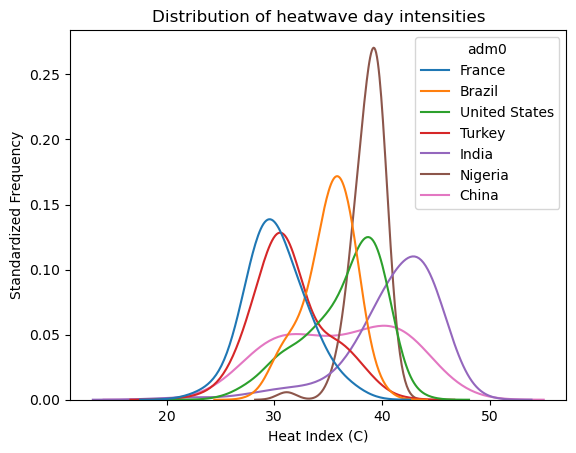

In [11]:
fig, ax = plt.subplots()
sns.kdeplot(data=concat_clean, ax=ax, x='thi_heat', c='blue', hue='adm0', common_norm=False, bw_adjust=2)
plt.xlabel("Heat Index (C)")
plt.ylabel("Standardized Frequency")
plt.title("Distribution of heatwave day intensities")